In [1]:
import pandas as pd
import pickle
import re

In [20]:
# plot the best results for each classifier
import matplotlib.pyplot as plt
import seaborn as sns

def plot_results(baseline_results, metric, threshold=-1, figsize=(10, 5), title='Baseline Results'):
    plt.rcParams['figure.dpi'] = 120
    sorted_results = sorted([(k, v['macro avg'][metric]) for k, v in baseline_results.items() if k != 'Size'], key=lambda x: x[1], reverse=True)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.xlabel(f'macro {metric}')
    plt.ylabel("Classifier")

    # remove 50 and 100 from the names
    sorted_results = [(re.sub('-50$', '', x[0]), x[1]) for x in sorted_results]
    sorted_results = [(re.sub('-100$', '', x[0]), x[1]) for x in sorted_results]

    sns.barplot(x=[x[1] for x in sorted_results if x[1] > threshold], y=[x[0] for x in sorted_results if x[1] > threshold]) 
    plt.xlim(0, min(max([x[1] for x in sorted_results])+0.07, 1))
    
    # put the scores on the bars
    for i, v in enumerate([x[1] for x in sorted_results]):
        if v > threshold:
            # set fonr size
            plt.text(v, i + .26, f'{v:.2f}', color='black', rotation=-90, fontsize=8)

def plot_sizes(sizes, title, xlabel, figsize=(10, 5), is_ratio=False):
    # set dpi
    plt.rcParams['figure.dpi'] = 120
    sorted_sizes = sorted([(k, v) for k, v in sizes.items()], key=lambda x: x[1], reverse=True)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Method")

    if is_ratio:
        sns.barplot(x=[x[1] for x in sorted_sizes], y=[x[0] for x in sorted_sizes])
        plt.xlim(0, max([x[1] for x in sorted_sizes])+10)
        # for i, v in enumerate([x[1] for x in sorted_sizes]):
        #     plt.text(v, i + .25, f'{v:.2f}', color='black')
    else:
        # use a fixed color for each method
        colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd']
        sns.barplot(x=[x[1]/(1024*1024) for x in sorted_sizes], y=[x[0] for x in sorted_sizes], palette=colors)
        # plt.xlim(0, max([x[1] for x in sorted_sizes])/(1024*1024)+20)
        plt.xlim(0, 9.5)
        for i, v in enumerate([x[1] for x in sorted_sizes]):
            plt.text(v/(1024*1024), i + .25, f'{v/(1024*1024):.2f}', color='black', fontsize=8)


    plt.tight_layout()

def plot_inference_time(inference_times, title, xlabel, figsize=(10, 5)):
    plt.rcParams['figure.dpi'] = 120
    sorted_inference_times = sorted([(k, v['infer_time']) for k, v in inference_times.items() if k != 'Size'], key=lambda x: x[1], reverse=True)
    plt.figure(figsize=figsize)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel("Classifier")

    # remove 50 and 100 from the names
    sorted_inference_times = [(re.sub('-50$', '', x[0]), x[1]) for x in sorted_inference_times]
    sorted_inference_times = [(re.sub('-100$', '', x[0]), x[1]) for x in sorted_inference_times]

    sns.barplot(x=[x[1] for x in sorted_inference_times], y=[x[0] for x in sorted_inference_times])

    plt.xlim(0, max([x[1] for x in sorted_inference_times])+1500)
    for i, v in enumerate([x[1] for x in sorted_inference_times]):
        plt.text(v, i + .25, f'{v:.2f}', color='black', fontsize=8)

    plt.tight_layout()

# CheckThatLab

In [158]:
with open('Approach 2/baseline_results_approach3_checkthat_lab.pkl', 'rb') as f:
    baseline_results = pickle.load(f)

with open('Approach 1/VAE_CheckThatLab.pickle', 'rb') as f:
    app1_results = pickle.load(f)

with open('Approach 2/proposed_results_approach3_checkthat_lab.pkl', 'rb') as f:
    app2_results = pickle.load(f)

with open('Approach 3/proposed_results_CheckThatLab.pkl', 'rb') as f:
    app3_results = pickle.load(f)

In [159]:
with open('Approach 2/sizes_approach3_checkthat_lab.pkl', 'rb') as f:
    app2_sizes = pickle.load(f)

with open('Approach 3/size_all_datasets.pkl', 'rb') as f:
    app3_sizes = pickle.load(f)

In [6]:
# open the files in another cell and manually copy the data into the dictionary
sizes = {
    'PCA': 2386000,
    't-SNE': 200000,
    'LDA': 47720, 
    'Original': 9162240,
    'VAE': 1325600,
    'rRF': 4041216
}

In [5]:
# # clean up results and make them more consistent
# app1_results = {k.replace('_CheckThatLab', ''): v for k, v in app1_results.items()}
# app3_results = {k.replace('Approach3-', ''): v for k, v in app3_results.items()}
# app2_results = {k: v for k, v in app2_results.items() if 'ISOMAP' not in k}

In [166]:
# merge all results into one dictionary
all_results = app1_results | app2_results
all_results = all_results | app3_results
all_results = all_results | baseline_results

In [168]:
all_results.keys()

dict_keys(['Naive-Bayes VAE', 'KNN-50 VAE', 'RandomForest-100 VAE', 'MLP-(200, 100) VAE', 'SVM-rbf VAE', 'Size', 'SVM-rbf PCA-100', 'MLP-(200, 100) PCA-100', 'RandomForest-100 PCA-100', 'KNN-50 PCA-100', 'Naive-Bayes PCA-100', 'SVM-rbf t-SNE-50', 'MLP-(200, 100) t-SNE-50', 'RandomForest-100 t-SNE-50', 'KNN-50 t-SNE-50', 'Naive-Bayes t-SNE-50', 'SVM-rbf LDA', 'MLP-(200, 100) LDA', 'RandomForest-100 LDA', 'KNN-50 LDA', 'Naive-Bayes LDA', 'SVM-rbf rRF', 'MLP-(200, 100) rRF', 'RandomForest-100 rRF', 'KNN-50 rRF', 'SVM-rbf ', 'MLP-(200, 100) ', 'RandomForest-100 ', 'KNN-50 ', 'Naive-Bayes '])

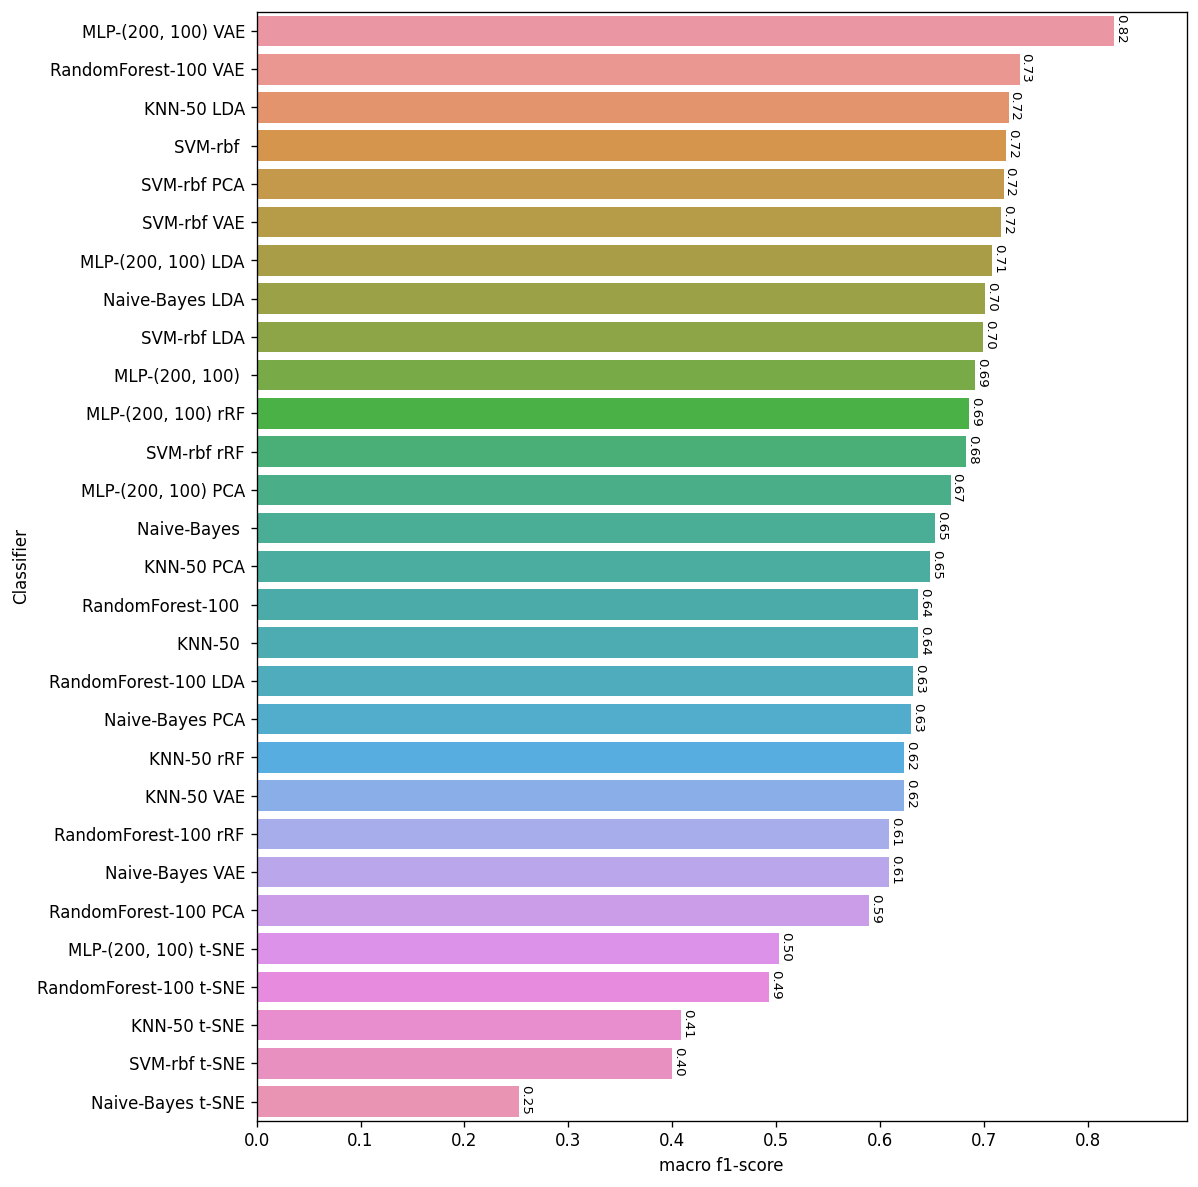

In [171]:
plot_results(all_results, 'f1-score', figsize=(10, 12), title='')

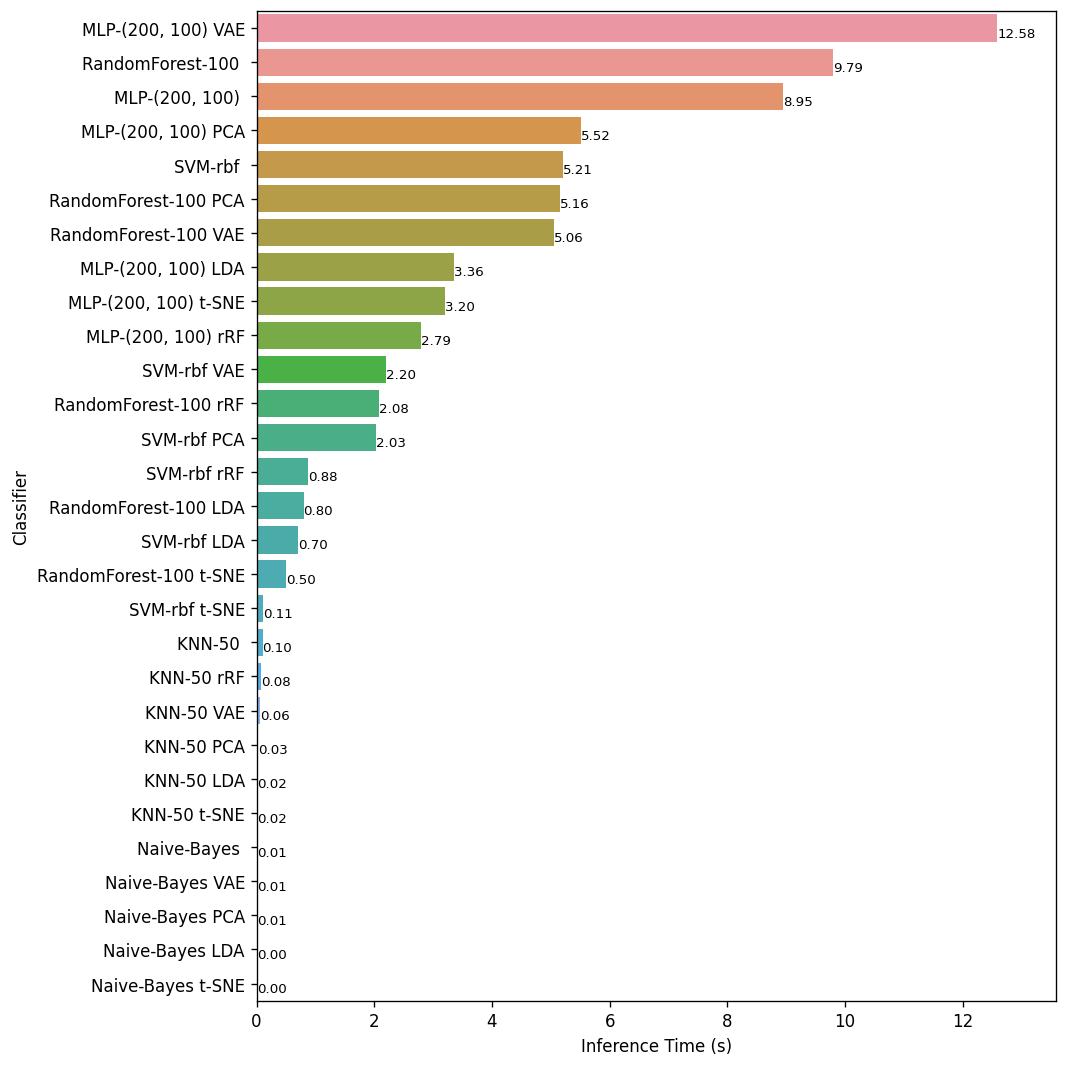

In [172]:
plot_inference_time(all_results, '', 'Inference Time (s)', (9, 9))

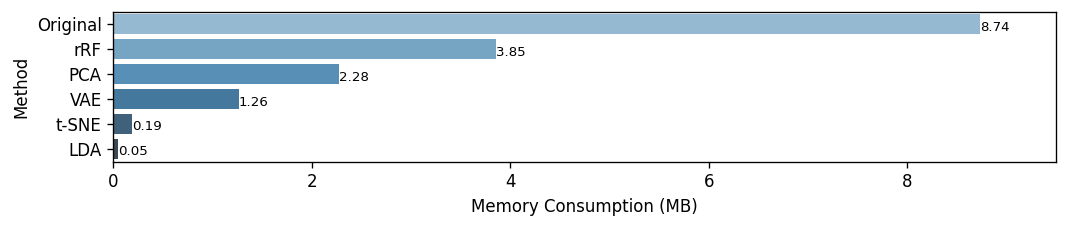

In [21]:
plot_sizes(sizes, '', 'Memory Consumption (MB)', figsize=(9, 2))

# Aspect

In [181]:
with open('Approach 2/baseline_results_approach3_aspect.pkl', 'rb') as f:
    baseline_results = pickle.load(f)

with open('Approach 1/VAE_Aspect.pickle', 'rb') as f:
    app1_results = pickle.load(f)

with open('Approach 2/proposed_results_approach3_aspect.pkl', 'rb') as f:
    app2_results = pickle.load(f)

with open('Approach 3/proposed_results_AspectSentimentAnalysis.pkl', 'rb') as f:
    app3_results = pickle.load(f)

In [182]:
with open('Approach 2/sizes_approach3_aspect.pkl', 'rb') as f:
    app2_sizes = pickle.load(f)


In [189]:
sizes = {
    'PCA': 865200,
    't-SNE': 200000,
    'LDA': 34608,
    'Original': 3322368,
    'rRF': 3230208,
    'VAE': 432600
}

In [185]:
# clean up results and make them more consistent
app1_results = {k.replace('_Aspect', ''): v for k, v in app1_results.items()}
app3_results = {k.replace('Approach3-', ''): v for k, v in app3_results.items()}
app2_results = {k: v for k, v in app2_results.items() if 'ISOMAP' not in k}

In [186]:
# merge all results into one dictionary
all_results = app1_results | app2_results
all_results = all_results | app3_results
all_results = all_results | baseline_results

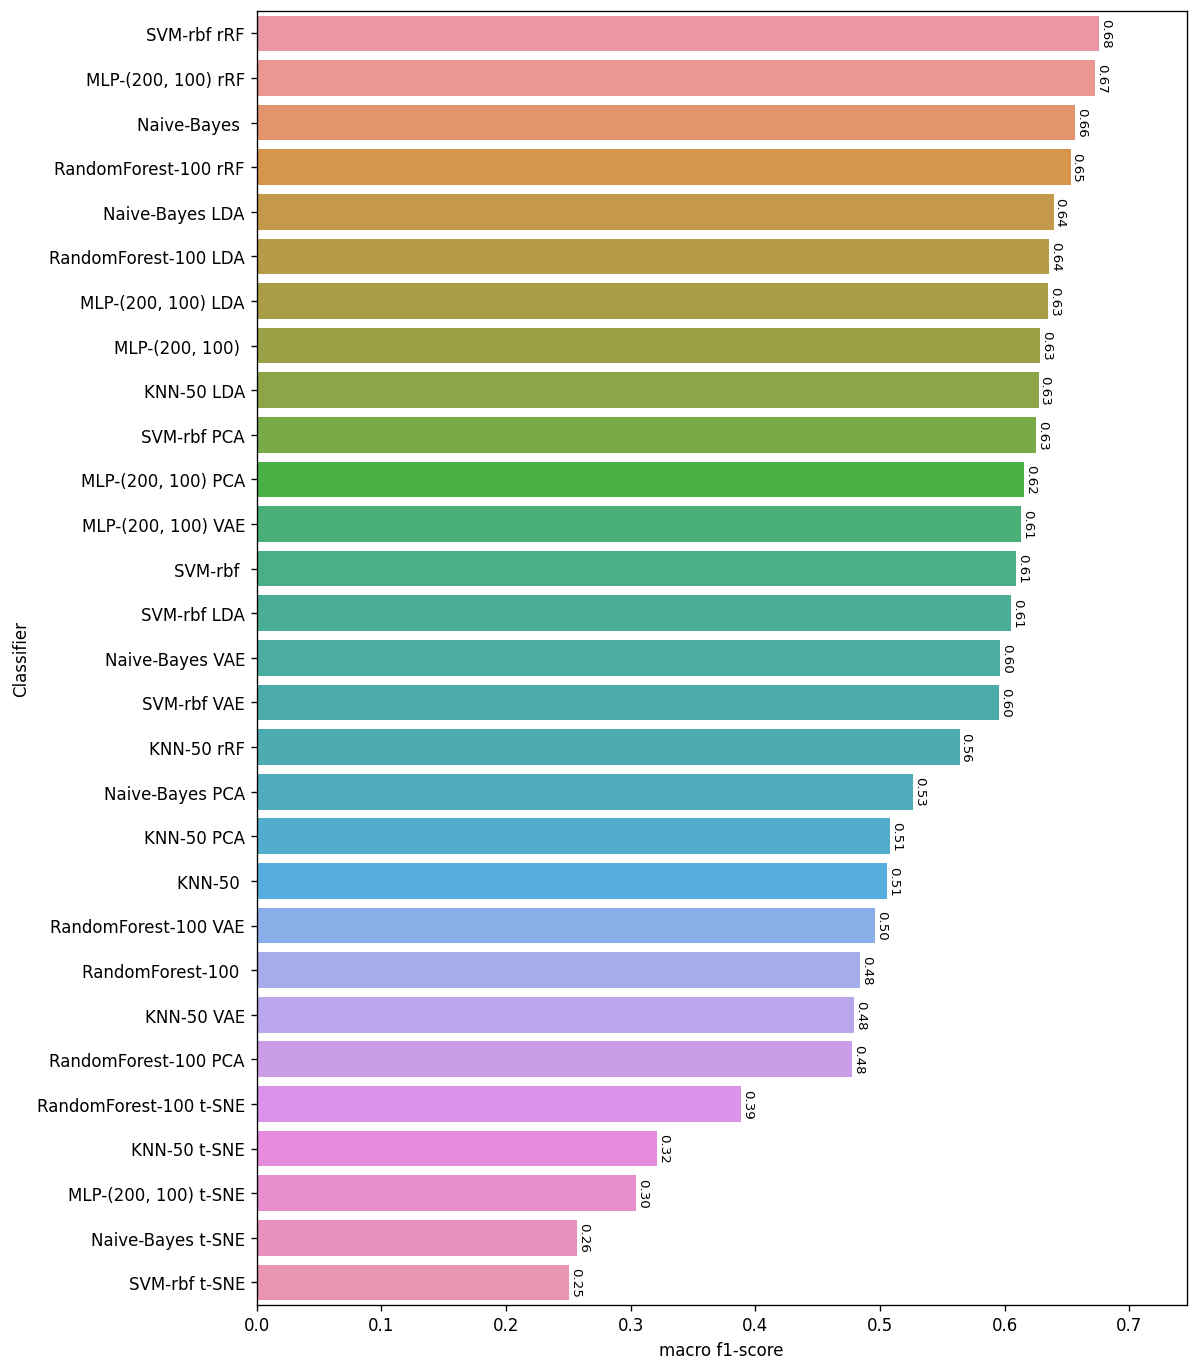

In [187]:
plot_results(all_results, 'f1-score', figsize=(10, 14), title='')

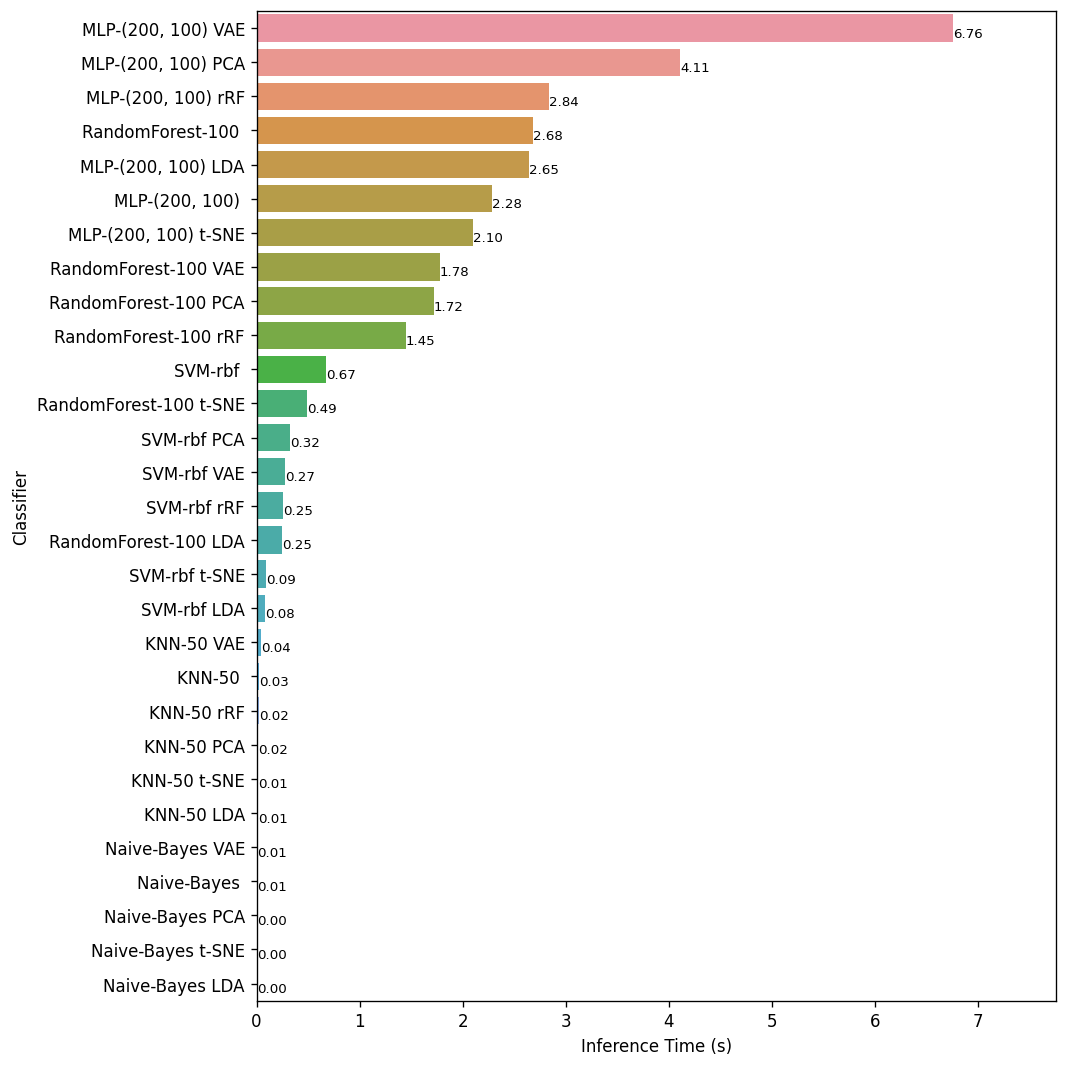

In [190]:
plot_inference_time(all_results, '', 'Inference Time (s)', (9, 9))

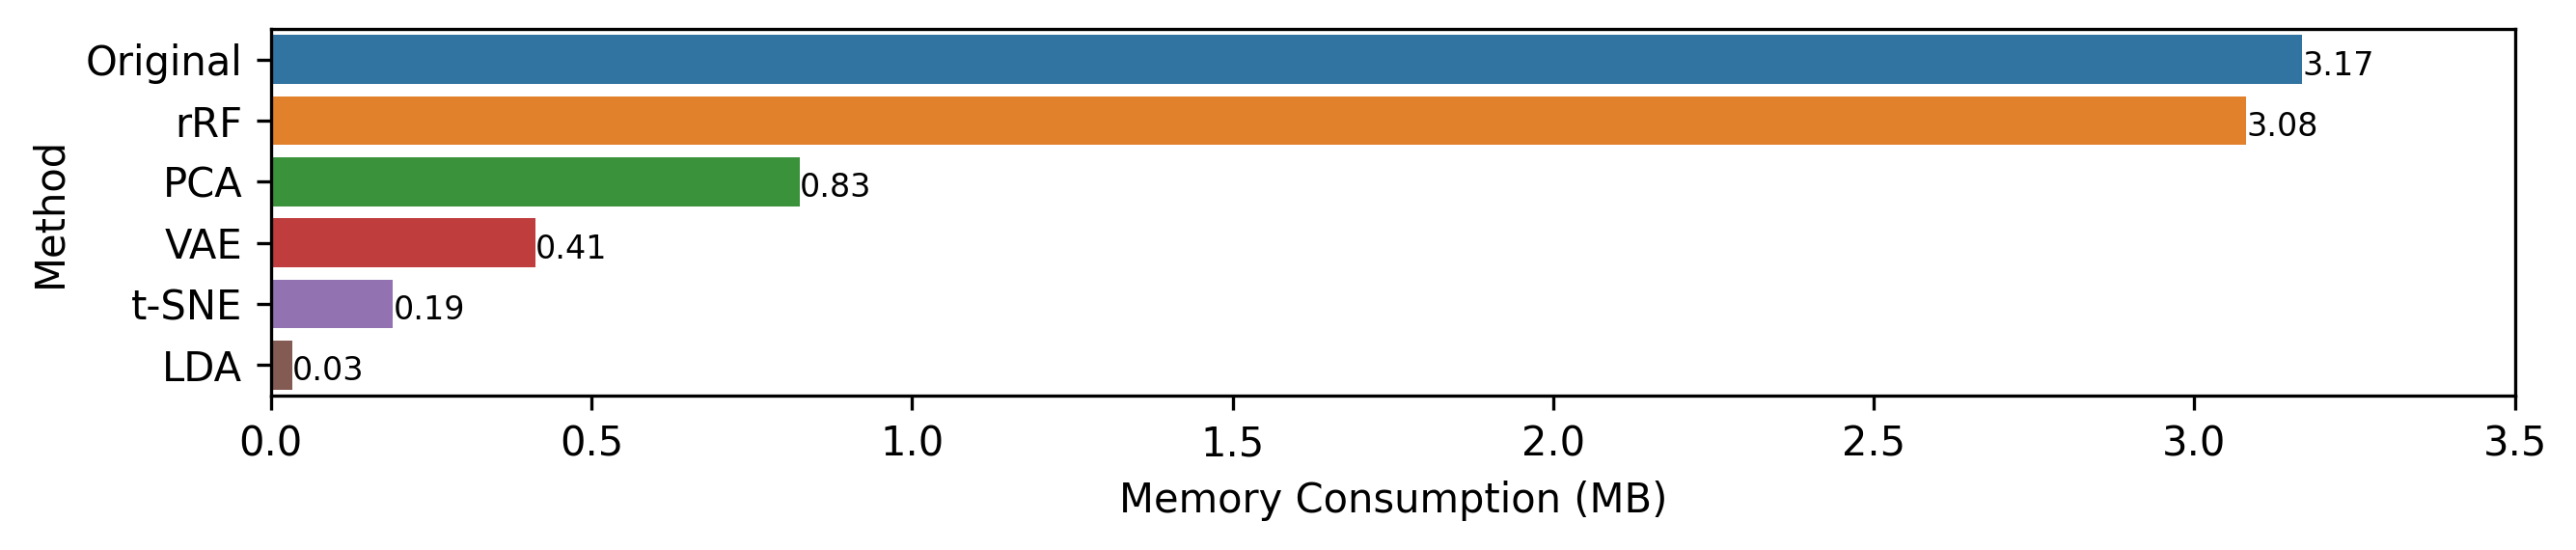

In [197]:
plot_sizes(sizes, '', 'Memory Consumption (MB)', figsize=(9, 2))

# FEVER

In [198]:
with open('Approach 2/baseline_results_approach3_fever.pkl', 'rb') as f:
    baseline_results = pickle.load(f)

with open('Approach 1/VAE_FEVER.pickle', 'rb') as f:
    app1_results = pickle.load(f)

with open('Approach 2/proposed_results_approach3_fever.pkl', 'rb') as f:
    app2_results = pickle.load(f)

with open('Approach 3/proposed_results_FEVER.pkl', 'rb') as f:
    app3_results = pickle.load(f)

In [217]:
with open('Approach 2/sizes_approach3_fever.pkl', 'rb') as f:
    app2_sizes = pickle.load(f)


In [221]:
sizes = {
    'Original': 223409664,
    'PCA': 58179600,
    't-SNE': 200000,
    'LDA': 2327184,
    'rRF': 6865920,
    'VAE': 29089800
}

In [201]:
# clean up results and make them more consistent
app1_results = {k.replace('_FEVER', ''): v for k, v in app1_results.items()}
app3_results = {k.replace('Approach3-', ''): v for k, v in app3_results.items()}
app2_results = {k: v for k, v in app2_results.items() if 'ISOMAP' not in k}

In [202]:
# merge all results into one dictionary
all_results = app1_results | app2_results
all_results = all_results | app3_results
all_results = all_results | baseline_results

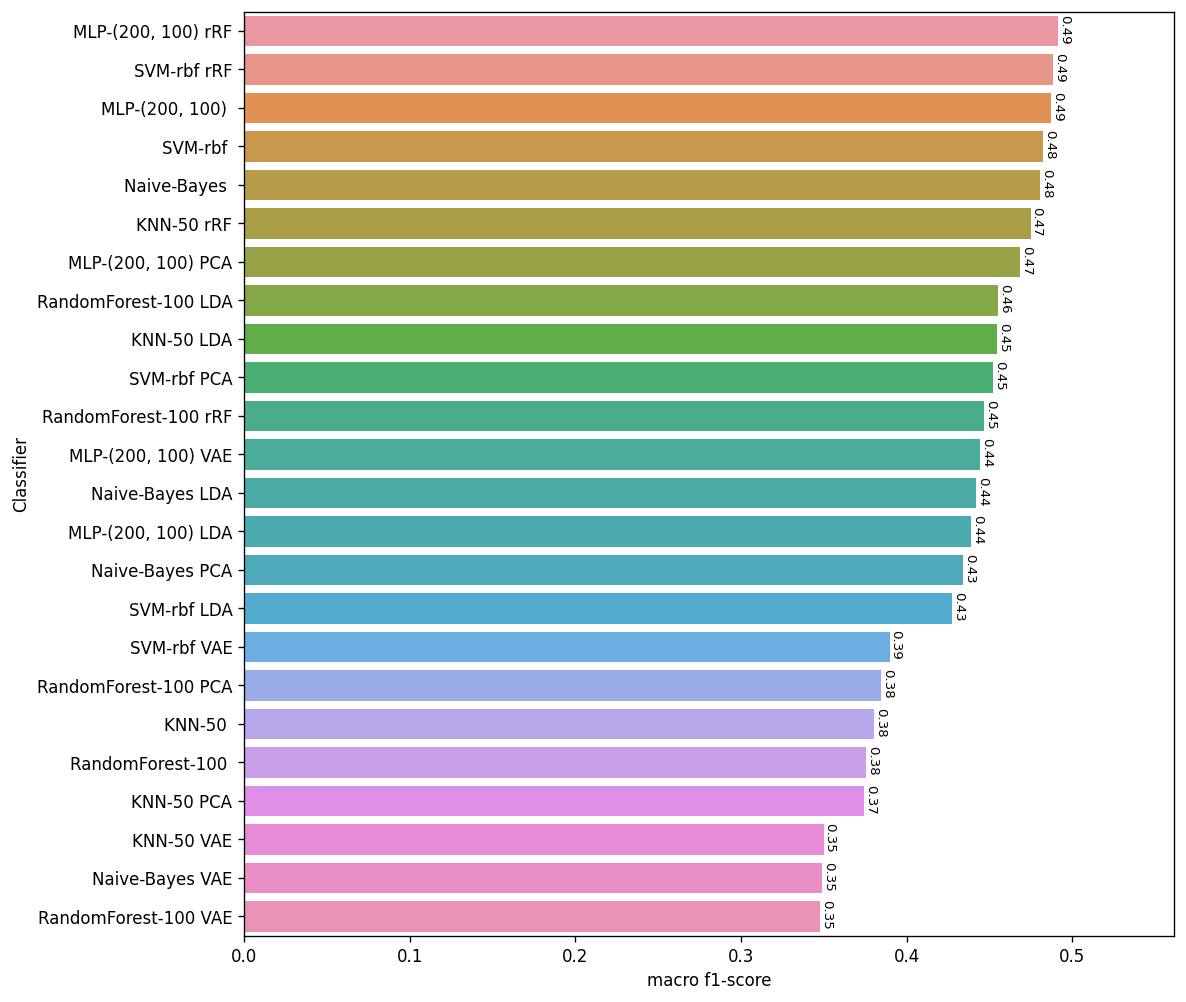

In [204]:
plot_results(all_results, 'f1-score', figsize=(10, 10), title='')

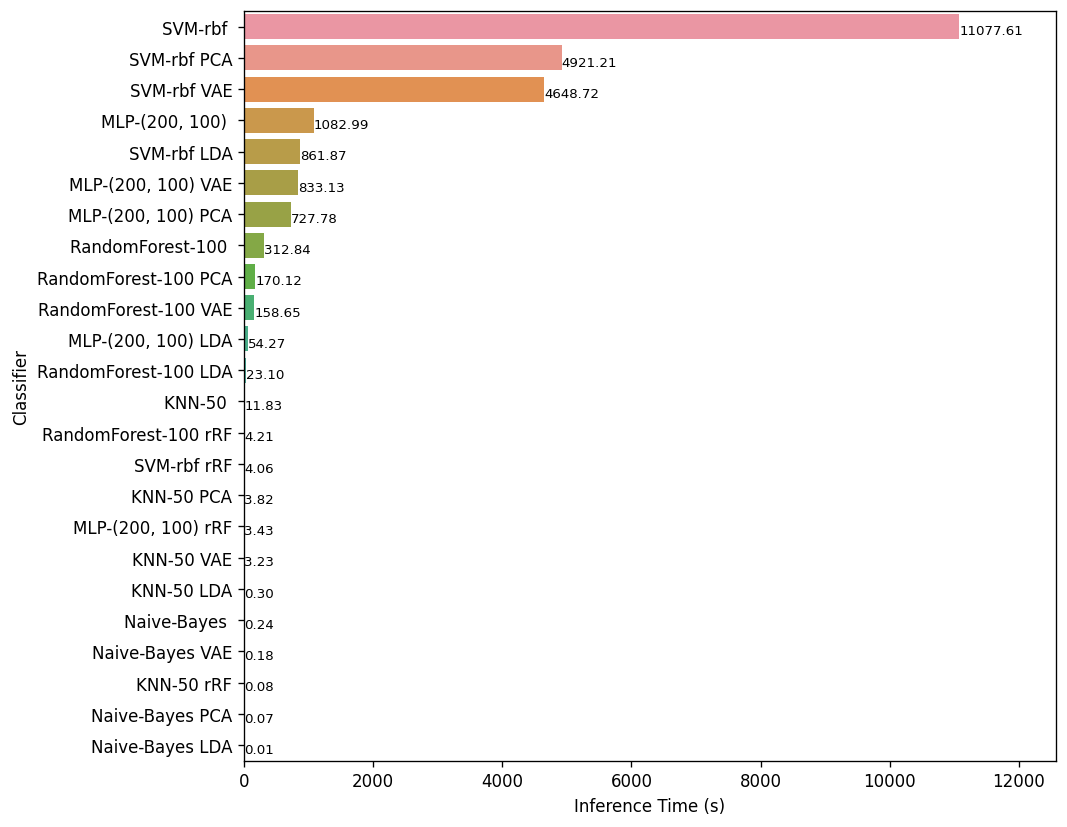

In [216]:
plot_inference_time(all_results, '', 'Inference Time (s)', (9, 7))

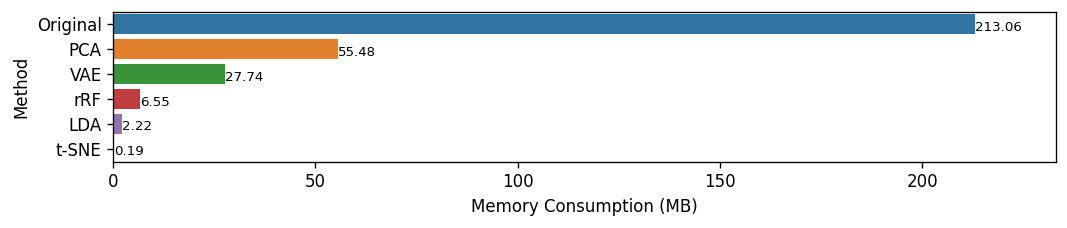

In [228]:
plot_sizes(sizes, '', 'Memory Consumption (MB)', figsize=(9, 2))